# Exploratory Analysis

In [ ]:
## Preliminary Analysis
####  Drop Null / Observation count

In [108]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np


%matplotlib inline


In [109]:
data_raw = pd.read_csv("datasets/autoplay_v4.csv")
data_raw.fillna(0, inplace=True)

print data_raw.head()

   userid  autoplayed_series_id  rewatched  genre  macro_genre  \
0   66550                 15354          1     27           34   
1   70698                 34254          0     14           35   
2   72583                 34177          1     26           33   
3   73488                 24620          0     11           34   
4   82220                 14871          0     19           36   

   previous_series_id  genre_prev  macro_genre_prev  hourofday  \
0               31676          26                33          1   
1               33587          14                35         17   
2               30439          27                34          1   
3               15195          25                35         16   
4               35240           3                33         19   

   series_popularity    ...     genre_28  genre_29  genre_30  genre_31  \
0                800    ...          0.0    0.0000       0.0       0.0   
1               5916    ...          0.0    0.0000       0

## Preliminary Analysis
####  Drop Null / Observation count

In [285]:
data = data_raw.dropna() 
data_edit = data_raw
data_edit['total_consumption'] = data_edit['genre_33'] + data_edit['genre_34'] + data_edit['genre_35'] + data_edit['genre_36'] + data_edit['genre_37']
data_edit['same_previous_genre'] = np.where(data_edit['genre'] == data_edit['genre_prev'], 1,0)
data_edit['same_previous_macro_genre'] = np.where(data_edit['macro_genre'] == data_edit['macro_genre_prev'], 1,0)
data_edit['time_of_day'] = np.where(data_edit['hourofday'] > 7, np.where(data_edit['hourofday'] > 18,'evening','daytime'),'late_night')
timedummy = (pd.get_dummies(data_edit['time_of_day']))
data_edit = data_edit.join(timedummy[['daytime', 'evening', 'late_night']])
data_edit = data_edit[~(data_edit['genre'] == 32)] 
data = data_edit[['rewatched','total_consumption','genre','macro_genre','same_previous_genre', 'same_previous_macro_genre','daytime','evening','late_night','genre_prev','macro_genre_prev','series_popularity','genre_popularity','same_genre_percent_watched','same_macro_genre_percent_watched']]
print data.count()



rewatched                           173993
total_consumption                   173993
genre                               173993
macro_genre                         173993
same_previous_genre                 173993
same_previous_macro_genre           173993
daytime                             173993
evening                             173993
late_night                          173993
genre_prev                          173993
macro_genre_prev                    173993
series_popularity                   173993
genre_popularity                    173993
same_genre_percent_watched          173993
same_macro_genre_percent_watched    173993
dtype: int64


After excluding Null records, the dataset includes x unique observations.

#### Summary table

In [286]:
print data.describe()

           rewatched  total_consumption          genre    macro_genre  \
count  173993.000000      173993.000000  173993.000000  173993.000000   
mean        0.280793        5014.309858      15.468387      34.327938   
std         0.449388        5071.428938       8.259989       1.104002   
min         0.000000           0.000000       1.000000      33.000000   
25%         0.000000        1482.421800       8.000000      33.000000   
50%         0.000000        3436.059916      14.000000      34.000000   
75%         1.000000        6842.748416      24.000000      35.000000   
max         1.000000       54352.125400      31.000000      36.000000   

       same_previous_genre  same_previous_macro_genre        daytime  \
count         173993.00000              173993.000000  173993.000000   
mean               0.46103                   0.582960       0.432402   
std                0.49848                   0.493071       0.495411   
min                0.00000                   0.000000 

#### Preliminary observations

In [287]:
Preliminary observations on each independent var

SyntaxError: invalid syntax (<ipython-input-287-a7547df83bf1>, line 1)

#### Box plots for Independent Variables

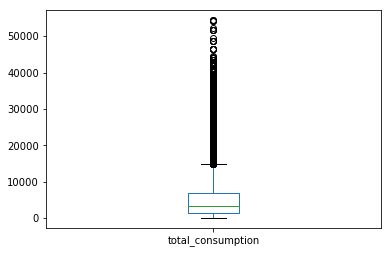

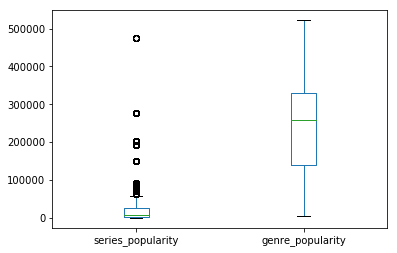

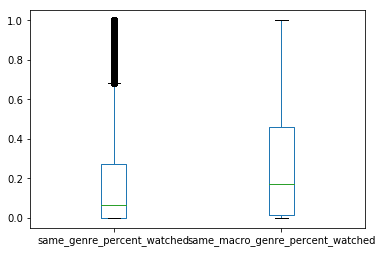

In [288]:
data[['total_consumption']].plot(kind='box')
data[['series_popularity','genre_popularity']].plot(kind='box')
data[['same_genre_percent_watched','same_macro_genre_percent_watched']].plot(kind='box')

In [289]:
Comment on boxplots

SyntaxError: invalid syntax (<ipython-input-289-cff70bf89e76>, line 1)

#### Distribution description 

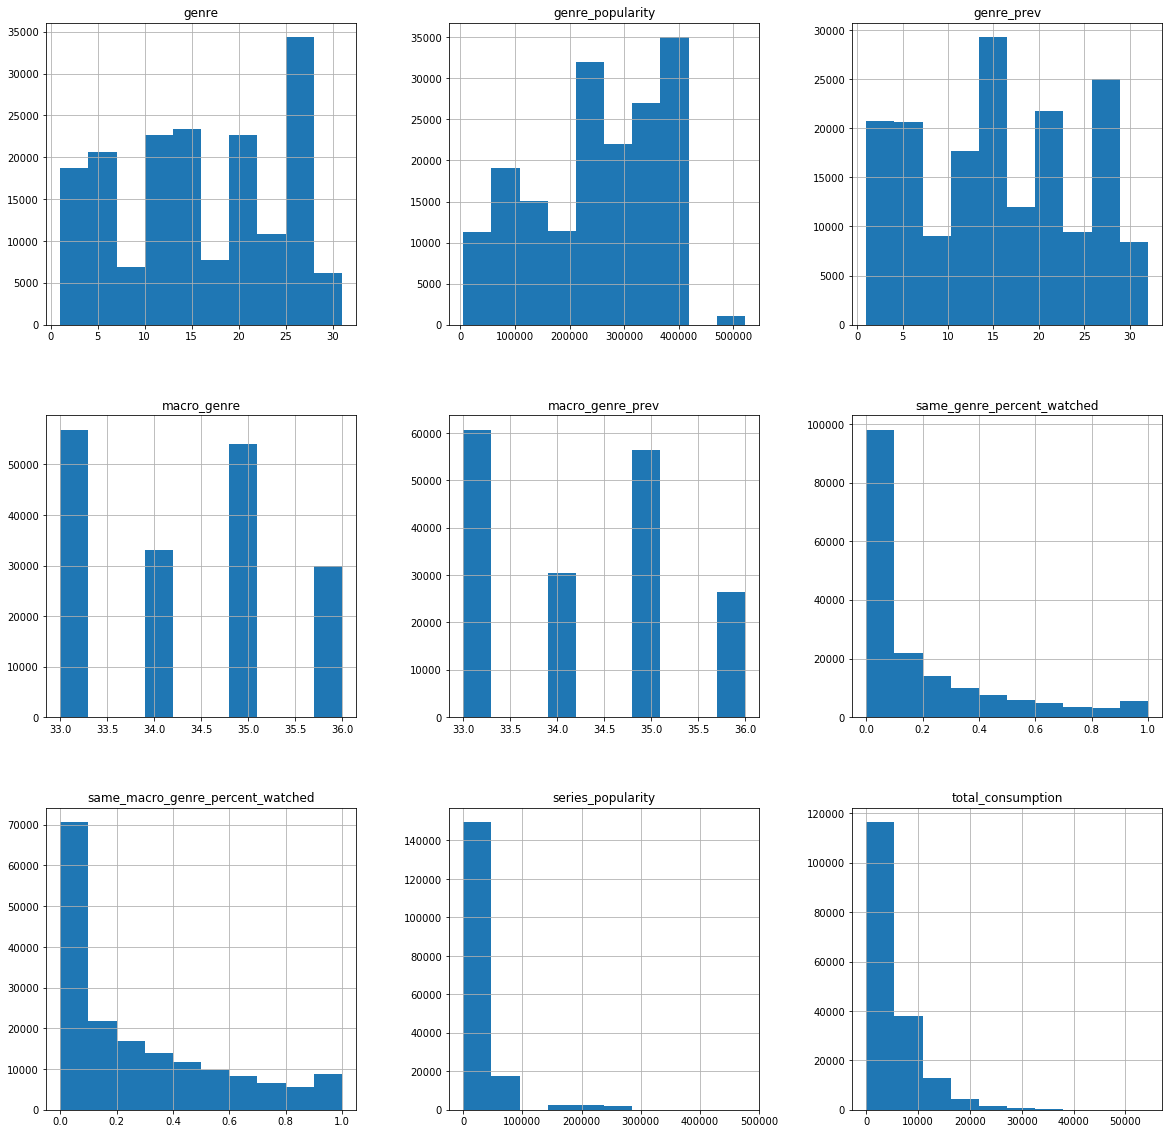

In [291]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data[['genre','macro_genre','genre_prev','macro_genre_prev','series_popularity','genre_popularity','same_genre_percent_watched','same_macro_genre_percent_watched','total_consumption']].hist(ax=ax)
pl.show()

Comment on distribution

#### Correlation

In [292]:
data.corr()

,rewatched,total_consumption,genre,macro_genre,same_previous_genre,same_previous_macro_genre,daytime,evening,late_night,genre_prev,macro_genre_prev,series_popularity,genre_popularity,same_genre_percent_watched,same_macro_genre_percent_watched
rewatched,1.000000,0.033597,0.061650,-0.028773,-0.066094,-0.044383,0.040080,0.069203,-0.108730,0.070911,-0.005163,0.096457,0.056404,0.024635,0.002851
total_consumption,0.033597,1.000000,0.064693,0.031305,-0.024739,-0.017678,0.004714,-0.054507,0.046705,0.064213,0.030716,-0.060922,-0.022396,-0.083321,-0.050960
genre,0.061650,0.064693,1.000000,0.001648,0.172128,0.173184,0.072860,0.007624,-0.085427,0.654386,0.046903,-0.117282,-0.086947,0.165740,-0.074307
macro_genre,-0.028773,0.031305,0.001648,1.000000,-0.074588,-0.050776,-0.040441,0.018081,0.026227,-0.036981,0.353162,-0.084874,-0.275663,-0.052311,-0.189515
same_previous_genre,-0.066094,-0.024739,0.172128,-0.074588,1.000000,0.782261,-0.022589,-0.033798,0.056337,0.148377,-0.034368,-0.142839,0.113808,0.353226,0.020989
same_previous_macro_genre,-0.044383,-0.017678,0.173184,-0.050776,0.782261,1.000000,-0.011788,-0.019113,0.030801,0.159586,0.000913,-0.121896,0.053562,0.270216,0.050231
daytime,0.040080,0.004714,0.072860,-0.040441,-0.022589,-0.011788,1.000000,-0.516843,-0.582277,0.065546,-0.050239,0.001971,0.054604,-0.003458,-0.017451
evening,0.069203,-0.054507,0.007624,0.018081,-0.033798,-0.019113,-0.516843,1.000000,-0.395039,0.014394,0.024942,0.030327,-0.008846,-0.011984,0.004354
late_night,-0.108730,0.046705,-0.085427,0.026227,0.056337,0.030801,-0.582277,-0.395039,1.000000,-0.084007,0.030225,-0.030916,-0.050195,0.015092,0.014592
genre_prev,0.070911,0.064213,0.654386,-0.036981,0.148377,0.159586,0.065546,0.014394,-0.084007,1.000000,0.134538,-0.070925,-0.055893,0.132397,-0.062897


Comments on collinearity

#### 

Comments

## Revisions on original work plan

#### 

In [281]:
Detail

NameError: name 'Detail' is not defined

#### 

#### 

## Additional edits and analysis

In [293]:
genre_dummy = (pd.get_dummies(data['genre']))
macro_genre_dummy = (pd.get_dummies(data['macro_genre']))
data = data.join(genre_dummy).join(macro_genre_dummy)

In [294]:
log_vars = data[['series_popularity','genre_popularity']]
log_vars = log_vars.apply(np.log10)
data['series_popularity'] = log_vars['series_popularity']
data['genre_popularity'] = log_vars['genre_popularity']

In [295]:
data[[33,34,35,36]].corr()

,33,34,35,36
33,1.000000,-0.338037,-0.467546,-0.317954
34,-0.338037,1.000000,-0.325361,-0.221262
35,-0.467546,-0.325361,1.000000,-0.306032
36,-0.317954,-0.221262,-0.306032,1.000000


In [366]:
X = data[['total_consumption','same_previous_macro_genre','same_macro_genre_percent_watched','series_popularity','genre_popularity','daytime','evening',33,34,35]]
X = sm.add_constant(X)
y = data['rewatched']
lm2 = sm.Logit(y, X)
result2 = lm2.fit()
print data.rewatched.mean()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.580085
         Iterations 5
0.280792905462


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              rewatched   No. Observations:               173993
Model:                          Logit   Df Residuals:                   173982
Method:                           MLE   Df Model:                           10
Date:                Sun, 22 Oct 2017   Pseudo R-squ.:                 0.02293
Time:                        12:37:59   Log-Likelihood:            -1.0093e+05
converged:                       True   LL-Null:                   -1.0330e+05
                                        LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.7004      0.101    -36.519      0.000      -3.899      -3.502
total_consumption                 2.196e-05   1.05e-06     20.922      0.000    1.99e-05     2.4e-05
same_previous_macro_genre           -0.1515      0.011    -13.533      0.000      -0.173      -0.130
same_macro_genre_percent_watched    -0.0719      0.019     -3.769      0.000      -0.109      -0.034
series_popularity                    0.2655      0.008     33.266      0.000       0.250       0.281
genre_popularity                     0.1990      0.019     10.311      0.000       0.161       0.237
daytime                              0.5053      0.013     37.663      0.000       0.479       0.532
evening                              0.6555      0.015     44.454      0.000       0.627       0.684
33                                   0.2085      0.017     12.186      0.000       0.175       0.242
34                                   0.4280      0.019     22.696      0.000       0.391       0.465
35                                   0.3016      0.017     17.561      0.000       0.268       0.335
====================================================================================================
"""

In [297]:
print np.exp(result2.params)

const                               0.024715
total_consumption                   1.000022
same_previous_macro_genre           0.859405
same_macro_genre_percent_watched    0.930651
series_popularity                   1.304132
genre_popularity                    1.220149
daytime                             1.657414
evening                             1.926076
33                                  1.231777
34                                  1.534248
35                                  1.352074
dtype: float64


In [298]:
params = result2.params
conf = result2.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                                      2.5%     97.5%        OR
const                             0.020263  0.030144  0.024715
total_consumption                 1.000020  1.000024  1.000022
same_previous_macro_genre         0.840752  0.878471  0.859405
same_macro_genre_percent_watched  0.896513  0.966088  0.930651
series_popularity                 1.283887  1.324695  1.304132
genre_popularity                  1.174864  1.267180  1.220149
daytime                           1.614403  1.701571  1.657414
evening                           1.871208  1.982553  1.926076
33                                1.191164  1.273775  1.231777
34                                1.478570  1.592022  1.534248
35                                1.307314  1.398366  1.352074


In [409]:
X1 = data['series_popularity',]

In [410]:
series_pop = np.linspace(data['series_popularity'].min(), data['series_popularity'].max(), 10)
genre_pop = np.linspace(data['genre_popularity'].min(), data['genre_popularity'].max(), 10)
print series_pop
print genre_pop

[ 0.          0.63087582  1.26175165  1.89262747  2.52350329  3.15437911
  3.78525494  4.41613076  5.04700658  5.67788241]
[ 3.70526486  3.92882924  4.15239361  4.37595799  4.59952237  4.82308674
  5.04665112  5.27021549  5.49377987  5.71734424]


In [411]:
def cartesian2(arrays):
    arrays = [np.asarray(a) for a in arrays]
    shape = (len(x) for x in arrays)

    ix = np.indices(shape, dtype=int)
    ix = ix.reshape(len(arrays), -1).T

    for n, arr in enumerate(arrays):
        ix[:, n] = arrays[n][ix[:, n]]

    return ix

In [412]:
combos = pd.DataFrame(cartesian2([series_pop, genre_pop,[33, 34, 35, 36], [1.]]))
# recreate the dummy variables
combos.columns = ['series_popularity', 'genre_popularity', 'macro_genre', 'intercept']
dummy_ranks = pd.get_dummies(combos['macro_genre'], prefix='macro_genre')
dummy_ranks.columns = ['macro_genre_33', 'macro_genre_34', 'macro_genre_35', 'macro_genre_36']

# keep only what we need for making predictions
cols_to_keep = ['series_popularity', 'genre_popularity', 'macro_genre', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'macro_genre_34':])

Xc = combos[['intercept','series_popularity', 'genre_popularity','macro_genre_34','macro_genre_35','macro_genre_36']]

print result2.predict(X)

0         0.194109
1         0.303517
2         0.255000
3         0.316153
4         0.373053
5         0.280399
6         0.310838
7         0.306253
8         0.387560
9         0.199189
13        0.470855
15        0.358729
16        0.270959
17        0.397212
18        0.227419
19        0.202771
20        0.217039
21        0.200345
22        0.247677
23        0.343951
24        0.265146
25        0.363902
26        0.283910
27        0.493224
28        0.161728
29        0.258304
30        0.421774
31        0.311197
32        0.378099
33        0.330585
            ...   
195355    0.234197
195356    0.190017
195357    0.213423
195359    0.142081
195360    0.369907
195361    0.218287
195362    0.316877
195364    0.187006
195365    0.299495
195366    0.213298
195367    0.236200
195368    0.284310
195369    0.158179
195370    0.290029
195371    0.390474
195372    0.335651
195373    0.159553
195374    0.261012
195375    0.138643
195376    0.196987
195377    0.170202
195378    0.

C:\Users\emanuele.rusina\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [ ]:
print result2.predict(Xc)

In [268]:
combos = pd.DataFrame(cartesian2([series_pop, genre_pop,[33, 34, 35, 36], [1.]]))
# recreate the dummy variables
combos.columns = ['series_popularity', 'genre_popularity', 'macro_genre', 'intercept']
dummy_ranks = pd.get_dummies(combos['macro_genre'], prefix='macro_genre')
dummy_ranks.columns = ['macro_genre_33', 'macro_genre_34', 'macro_genre_35', 'macro_genre_36']

# keep only what we need for making predictions
cols_to_keep = ['series_popularity', 'genre_popularity', 'macro_genre', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'macro_genre_33':])

# make predictions on the enumerated dataset
combos['rewatch_pred'] = result.predict(combos[train_cols])

print combos.head()

C:\Users\emanuele.rusina\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


ValueError: Must pass DataFrame with boolean values only

In [ ]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    
    # in case you're curious as to what this looks like
    # print grouped.head()
    #                      admit_pred
    # gre        prestige            
    # 220.000000 1           0.282462
    #            2           0.169987
    #            3           0.096544
    #            4           0.079859
    # 284.444444 1           0.311718
    
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')